## Final Course Project / Exam

#### Remmy Bisimbeko - B26099 - J24M19/011
#### My GitHub - https://github.com/RemmyBisimbeko/Data-Science

#### 6. Music Playlist Generaror
* Music Playlist Generator using a music API: Build a music playlist generator that utilizes a music API to recommend songs, create personalized playlists based on music genres, artists, moods, and user preferences.

Below is an implementation of the Music Playlist Generator using a music API project. 
For this prject, I used the Spotify API to fetch music data and generate playlists.

In [11]:
# Libs
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

In [16]:
def get_ugandan_tracks(sp, genres=['afrobeats'], limit=10):
    tracks = []
    for genre in genres:
        query = f'genre:{genre}'
        results = sp.search(q=query, limit=limit, type='track')
        tracks.extend(results['tracks']['items'])
    return tracks

def generate_playlist(sp, genres=['afrobeats'], limit_per_genre=5):
    playlist = []
    for genre in genres:
        ugandan_tracks = get_ugandan_tracks(sp, genres=[genre], limit=limit_per_genre)
        if ugandan_tracks:
            playlist.extend(ugandan_tracks)
        else:
            print(f"Failed to retrieve {limit_per_genre} songs for genre {genre}")
    return playlist

def plot_genre_distribution(playlist):
    genres = {}
    for track in playlist:
        # Assuming 'genre' is a key that contains the genre information
        genre = track.get('genre', 'Unknown')
        genres[genre] = genres.get(genre, 0) + 1
    sorted_genres = dict(sorted(genres.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_genres.keys(), sorted_genres.values())
    plt.xlabel('Genre')
    plt.ylabel('Frequency')
    plt.title('Distribution of Genres in Ugandan Playlist')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_artist_distribution(playlist):
    artists = {}
    for track in playlist:
        artist = ', '.join([artist['name'] for artist in track['artists']])
        artists[artist] = artists.get(artist, 0) + 1
    sorted_artists = dict(sorted(artists.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_artists.keys(), sorted_artists.values())
    plt.xlabel('Artist')
    plt.ylabel('Frequency')
    plt.title('Distribution of Artists in Ugandan Playlist')
    plt.xticks(rotation=45, ha='right')
    plt.show()

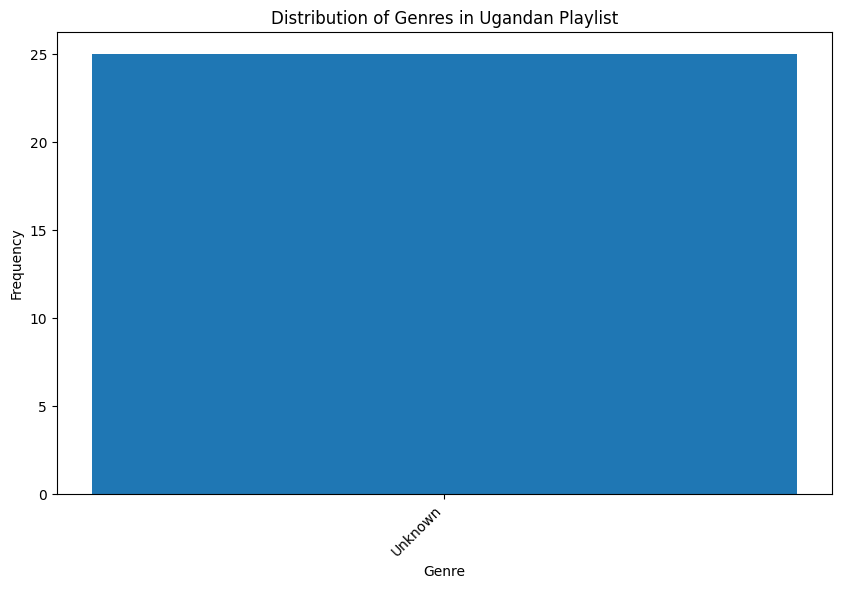

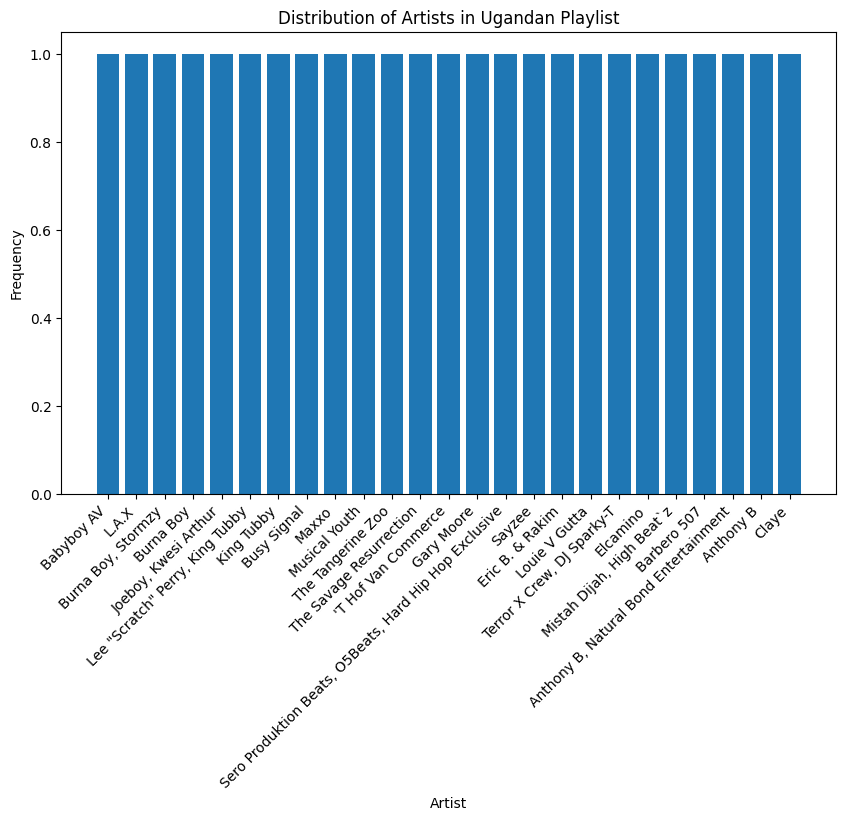

In [17]:
if __name__ == "__main__":
    client_credentials_manager = SpotifyClientCredentials(client_id='622534fd855e4cdaa627d6c684fa4b18', client_secret='f5a52be7dbf84faaabad885a3148e8f1')
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    genres = ['afrobeats', 'reggae', 'r&b', 'hip-hop', 'dancehall']  # Add more genres here
    playlist = generate_playlist(sp, genres=genres, limit_per_genre=5)
    
    # Plot genre distribution
    plot_genre_distribution(playlist)
    
    # Plot artist distribution
    plot_artist_distribution(playlist)